## Exploratory Data Analysis for Bati bank

In [3]:
import pandas as pd
import sys

In [5]:
import sys
print(sys.executable)


c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-6\.venv\Scripts\python.exe


## Overview of the data

In [6]:
# Load the data
df = pd.read_csv('../data/data.csv')

# Shape of the dataset
print(df.shape)

# Data types of each column
print(df.dtypes)


(95662, 16)
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [7]:
# Get the number of rows
num_rows = df.shape[0]

print(f"The dataset contains {num_rows} rows.")

The dataset contains 95662 rows.


## Summary statistics

In [12]:
print(df.head)

<bound method NDFrame.head of               TransactionId         BatchId       AccountId  \
0       TransactionId_76871   BatchId_36123  AccountId_3957   
1       TransactionId_73770   BatchId_15642  AccountId_4841   
2       TransactionId_26203   BatchId_53941  AccountId_4229   
3         TransactionId_380  BatchId_102363   AccountId_648   
4       TransactionId_28195   BatchId_38780  AccountId_4841   
...                     ...             ...             ...   
95657   TransactionId_89881   BatchId_96668  AccountId_4841   
95658   TransactionId_91597    BatchId_3503  AccountId_3439   
95659   TransactionId_82501  BatchId_118602  AccountId_4841   
95660  TransactionId_136354   BatchId_70924  AccountId_1346   
95661   TransactionId_35670   BatchId_29317  AccountId_4841   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
0       SubscriptionId_887  CustomerId_4406          UGX          256   
1      SubscriptionId_3829  CustomerId_4406          UGX          2

In [8]:
# Summary statistics
print(df.describe())


       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## Distribution of Numerical Features

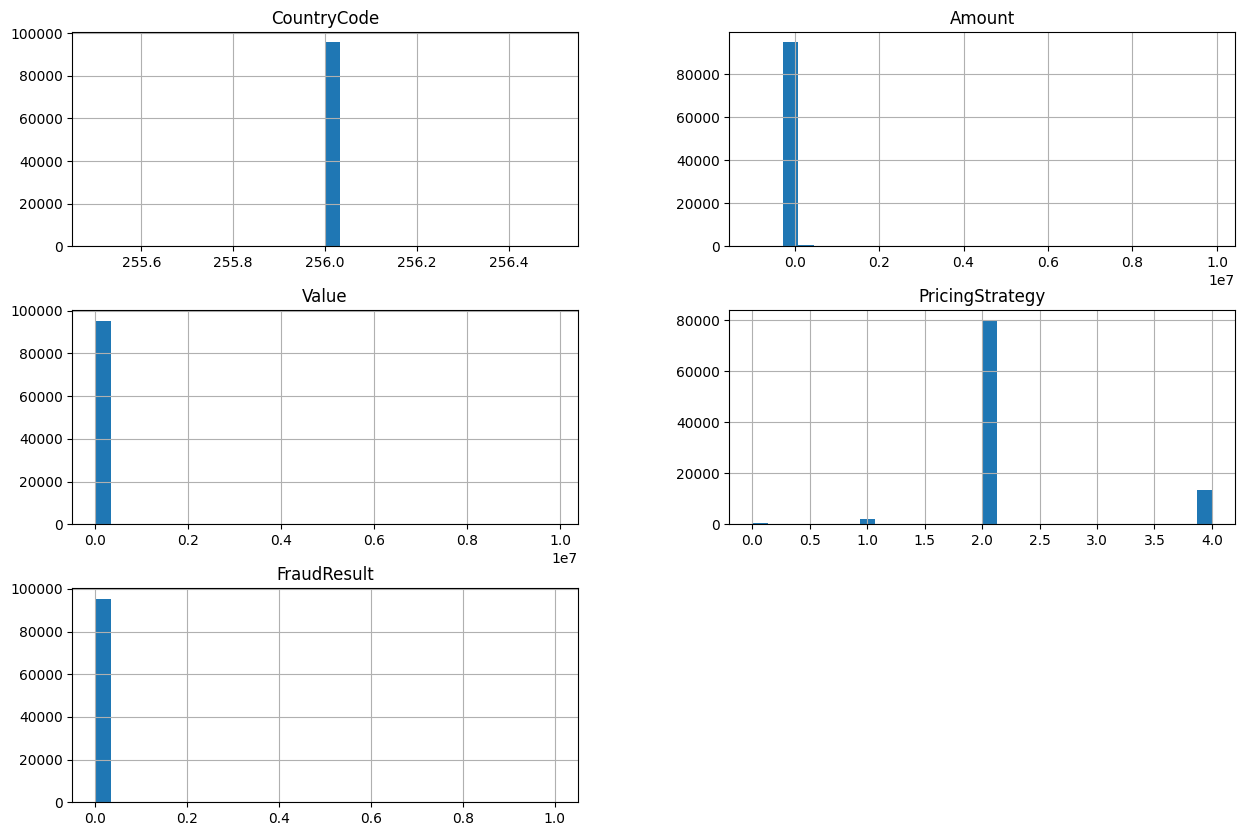

In [14]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.show()


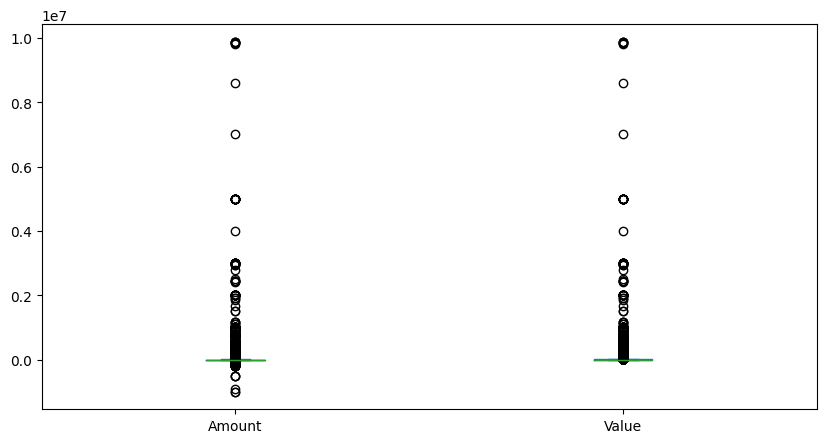

In [15]:
# Box plot for specific numerical columns ('Amount', 'Value')
df[['Amount', 'Value']].plot(kind='box', figsize=(10, 5))
plt.show()


C:\Users\NurselamHussen-ZOAEt\AppData\Local\Temp\ipykernel_27180\2789409290.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Amount'], shade=True)


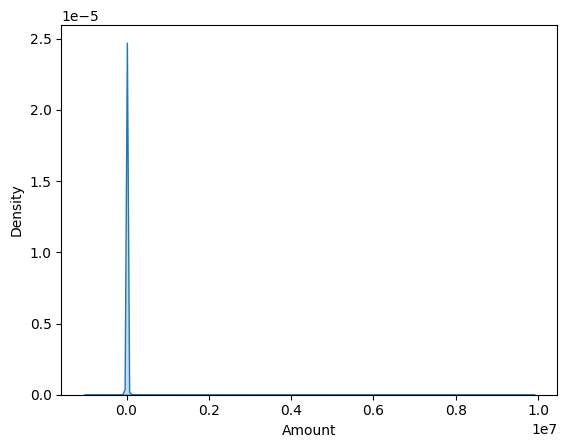

C:\Users\NurselamHussen-ZOAEt\AppData\Local\Temp\ipykernel_27180\2789409290.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Value'], shade=True)


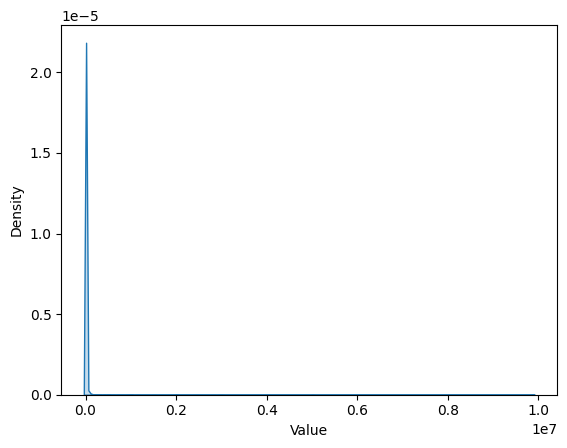

In [17]:
import seaborn as sns
# KDE plot for Amount
sns.kdeplot(df['Amount'], shade=True)
plt.show()
# KDE plot for Value
sns.kdeplot(df['Value'], shade=True)
plt.show()


## Distribution of Categoriccal Features

In [19]:
# Checking unique values for each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


TransactionId: 95662 unique values
BatchId: 94809 unique values
AccountId: 3633 unique values
SubscriptionId: 3627 unique values
CustomerId: 3742 unique values
CurrencyCode: 1 unique values
CountryCode: 1 unique values
ProviderId: 6 unique values
ProductId: 23 unique values
ProductCategory: 9 unique values
ChannelId: 4 unique values
Amount: 1676 unique values
Value: 1517 unique values
TransactionStartTime: 94556 unique values
PricingStrategy: 4 unique values
FraudResult: 2 unique values


In [20]:
# Check unique values in each column
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

    # Determine if column is likely categorical
    if unique_count < 20:  # Arbitrary threshold, can adjust based on domain knowledge
        print(f"{col} is likely categorical.\n")
    elif unique_count >= 20 and unique_count < 100:
        print(f"{col} has high cardinality. Investigate further.\n")
    else:
        print(f"{col} might be an identifier or continuous feature.\n")


TransactionId: 95662 unique values
TransactionId might be an identifier or continuous feature.

BatchId: 94809 unique values
BatchId might be an identifier or continuous feature.

AccountId: 3633 unique values
AccountId might be an identifier or continuous feature.

SubscriptionId: 3627 unique values
SubscriptionId might be an identifier or continuous feature.

CustomerId: 3742 unique values
CustomerId might be an identifier or continuous feature.

CurrencyCode: 1 unique values
CurrencyCode is likely categorical.

CountryCode: 1 unique values
CountryCode is likely categorical.

ProviderId: 6 unique values
ProviderId is likely categorical.

ProductId: 23 unique values
ProductId has high cardinality. Investigate further.

ProductCategory: 9 unique values
ProductCategory is likely categorical.

ChannelId: 4 unique values
ChannelId is likely categorical.

Amount: 1676 unique values
Amount might be an identifier or continuous feature.

Value: 1517 unique values
Value might be an identifier 

In [21]:
# From the unigue value I have identifed that the categorical data althogh the ProductId have 23 unique i will consider it as categorical data
categorical_columns = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 
                       'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']

# Value counts for categorical columns
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")


Value counts for CurrencyCode:
CurrencyCode
UGX    95662
Name: count, dtype: int64


Value counts for CountryCode:
CountryCode
256    95662
Name: count, dtype: int64


Value counts for ProviderId:
ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64


Value counts for ProductId:
ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
ProductId_13      296
ProductId_2       236
ProductId_20      216
ProductId_8       197
ProductId_24      175
ProductId_22      112
ProductId_7        86
ProductId_27       31
ProductId_5        25
ProductId_9        17
ProductId_16       10
ProductId_12        2
ProductId_23        1
Name: count, dtype: int64


Value counts for ProductCategory:
ProductCategory
financial_

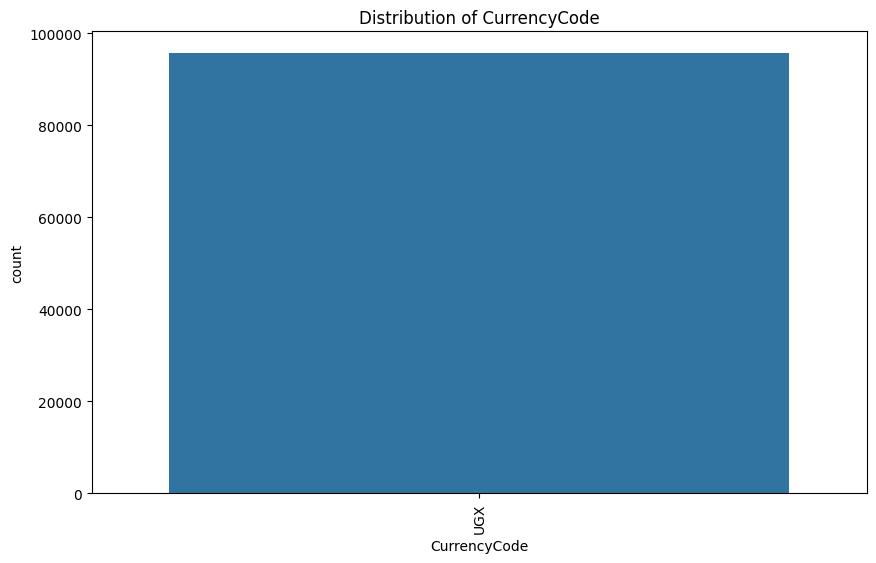

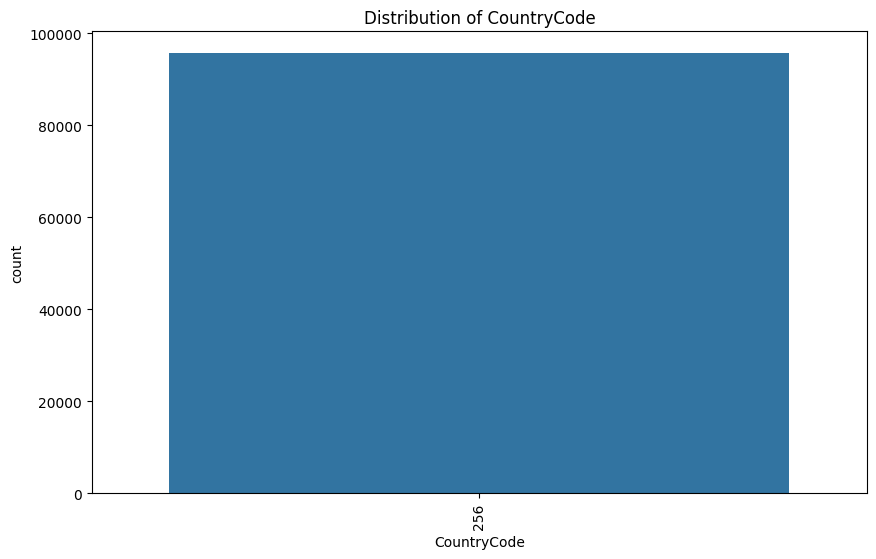

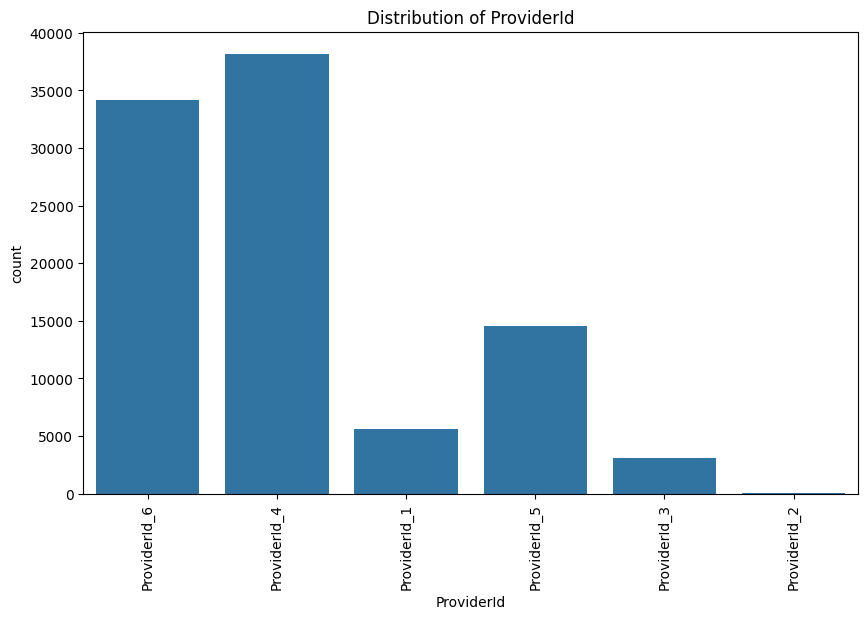

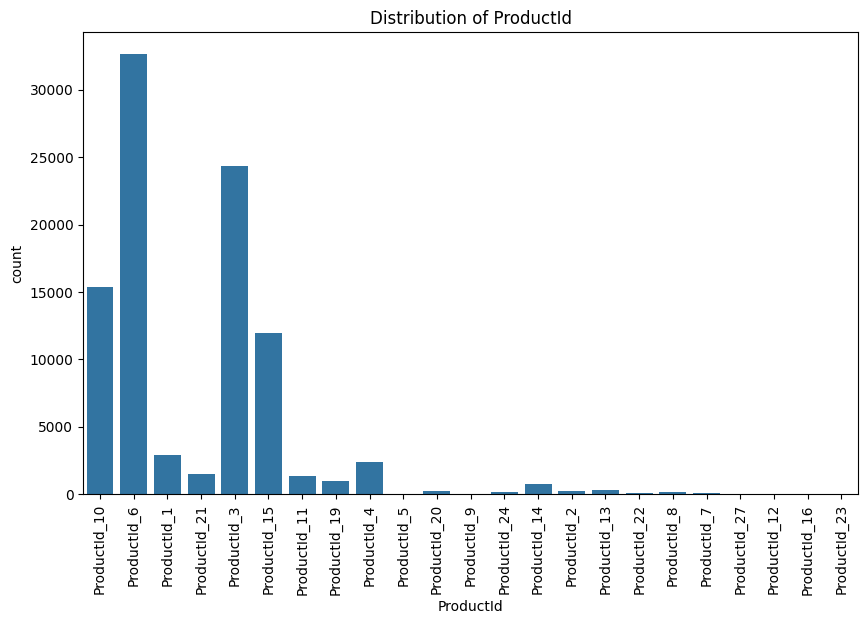

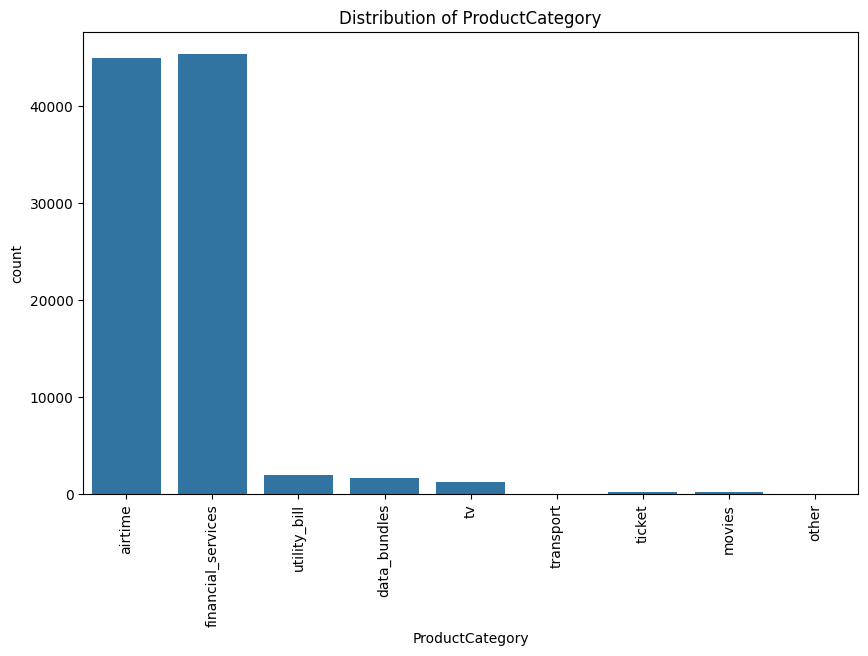

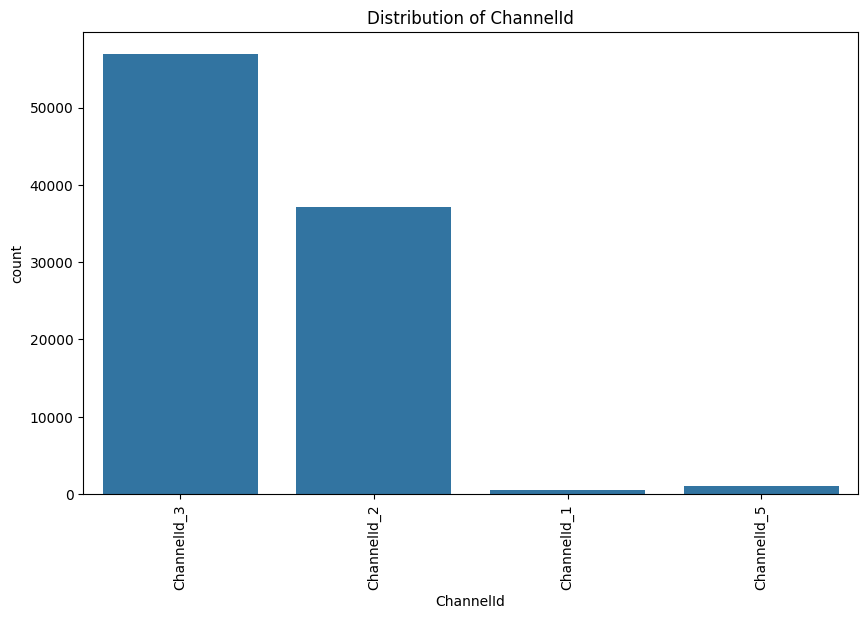

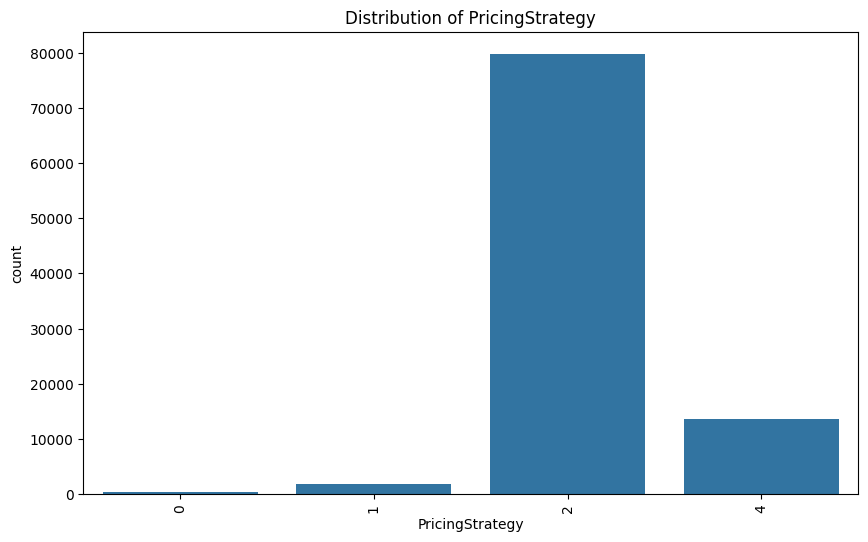

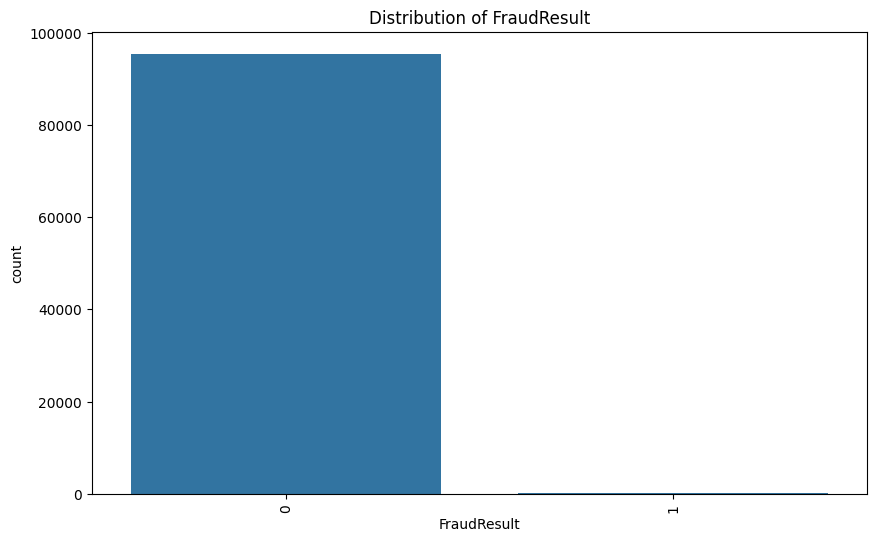

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar plots for each categorical variable
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()


In [23]:
# Analyzing fraud distribution for each categorical variable
for col in categorical_columns:
    fraud_distribution = df.groupby(col)['FraudResult'].mean()
    print(f"Fraud Distribution by {col}:")
    print(fraud_distribution)
    print("\n")


Fraud Distribution by CurrencyCode:
CurrencyCode
UGX    0.002018
Name: FraudResult, dtype: float64


Fraud Distribution by CountryCode:
CountryCode
256    0.002018
Name: FraudResult, dtype: float64


Fraud Distribution by ProviderId:
ProviderId
ProviderId_1    0.010101
ProviderId_2    0.000000
ProviderId_3    0.020752
ProviderId_4    0.000131
ProviderId_5    0.004401
ProviderId_6    0.000088
Name: FraudResult, dtype: float64


Fraud Distribution by ProductId:
ProductId
ProductId_1     0.000000
ProductId_10    0.000390
ProductId_11    0.000000
ProductId_12    0.000000
ProductId_13    0.020270
ProductId_14    0.000000
ProductId_15    0.013123
ProductId_16    0.000000
ProductId_19    0.000000
ProductId_2     0.000000
ProductId_20    0.000000
ProductId_21    0.002646
ProductId_22    0.017857
ProductId_23    0.000000
ProductId_24    0.000000
ProductId_27    0.000000
ProductId_3     0.000493
ProductId_4     0.000000
ProductId_5     0.080000
ProductId_6     0.000031
ProductId_7     0.000000
P

## Correlation Analysis

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select specific numerical columns
numerical_columns = ['Amount', 'Value', 'FraudResult']  # Add more columns if needed

# Create a new dataframe with just the selected columns
df_selected = df[numerical_columns]


In [26]:
# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix
print(correlation_matrix)


               Amount     Value  FraudResult
Amount       1.000000  0.989692     0.557370
Value        0.989692  1.000000     0.566739
FraudResult  0.557370  0.566739     1.000000


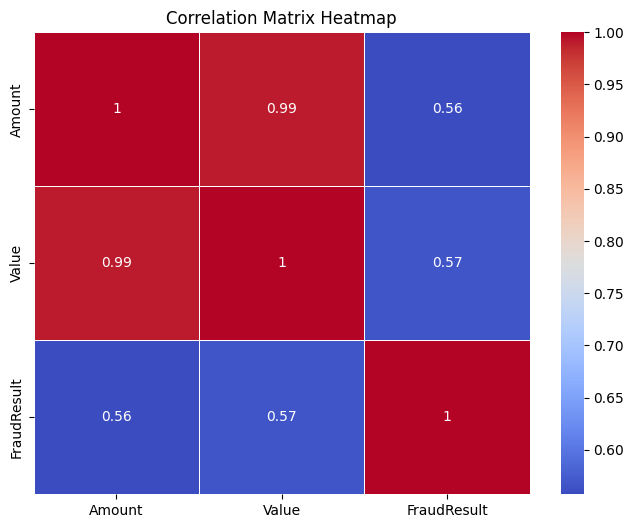

In [27]:
# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


## Identifying Missing Values

In [28]:
# Check for missing values in categorical columns
df[categorical_columns].isnull().sum()


CurrencyCode       0
CountryCode        0
ProviderId         0
ProductId          0
ProductCategory    0
ChannelId          0
PricingStrategy    0
FraudResult        0
dtype: int64

## Outlier Detection

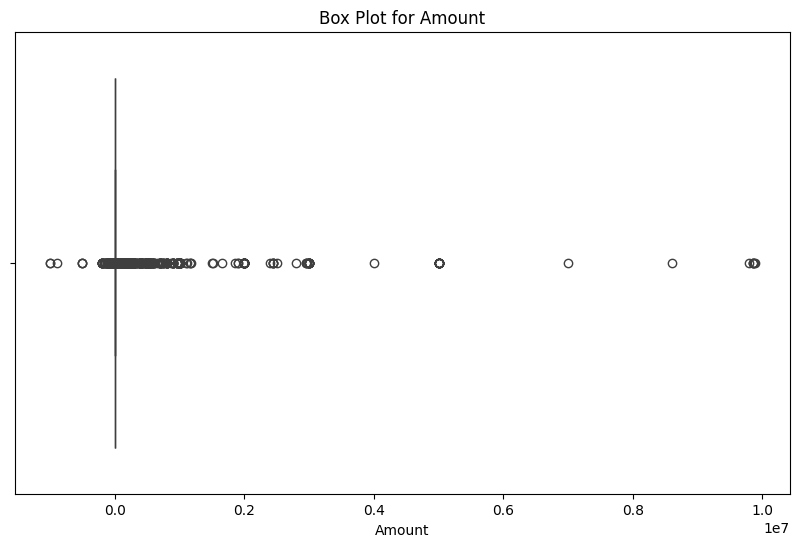

In [29]:
# Box plot for 'Amount' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Box Plot for Amount')
plt.show()


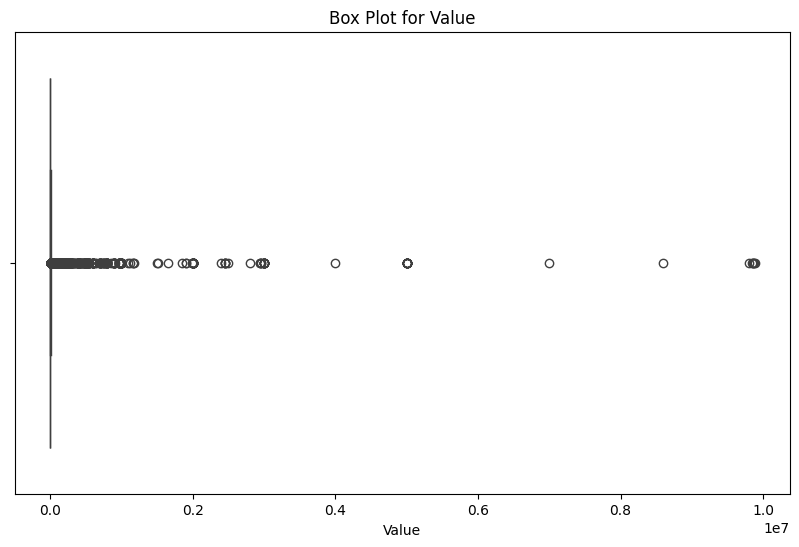

In [30]:
# Box plot for 'Value' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Value'])
plt.title('Box Plot for Value')
plt.show()
